In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 4.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=5f44a5adaf6fe40a94e5aab4f903cd4edc1ca7e49d682f77054087a079ce5fdf
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [4]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
data.head()

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,Food_InsecurityLevel,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,1.0,11.19,-0.95,254.0,7.0,2.0,1.040,4.0,1.9,44.69,5.0,0.0,0.0,2.0,0.0,0.0,246.141708,49.228342,274.373884,164.857702,77.460517,32.055664,0.0,0.717683,0.116832,4621.267353,754.360895,0.0,702.949550,0.696542,0.303458,135.0,3,-0.866025,0.500000,5.000000e-01,-0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11.19,-0.95,346.0,10.0,1.2,4.000,3.0,1.9,40.68,4.0,0.0,0.0,2.0,0.0,0.0,18.317522,0.000000,298.162446,0.000000,279.844923,18.317522,0.0,0.061435,0.061435,2503.023263,2303.522017,0.0,15127.399228,0.539852,0.460148,100.0,4,-0.500000,0.866025,5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.19,-0.99,324.0,6.0,0.8,0.300,4.0,1.9,55.03,4.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.000000,23.278518,0.000000,23.278518,0.000000,0.0,0.000000,0.000000,381.108158,381.108158,9.0,113.654565,0.695815,0.304185,50.0,4,-0.866025,0.500000,-5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,11.19,-0.99,326.0,6.0,0.8,2.595,4.0,1.9,32.23,5.0,0.0,0.0,1.0,0.0,0.0,476.255585,238.127792,264.840846,228.969031,26.713054,9.158761,0.0,0.899135,0.034582,1565.751162,620.787518,4.0,8131.192450,0.243574,0.756426,150.0,2,-0.866025,0.500000,-5.000000e-01,0.866025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,11.22,-1.02,308.0,8.0,4.0,2.120,4.0,1.9,51.67,2.0,0.0,0.0,1.0,0.0,0.0,32.971540,0.000000,194.809347,22.896903,161.837807,10.074637,0.0,0.169250,0.051715,2209.261281,1767.543491,0.0,13331.792068,0.606037,0.393963,250.0,4,-0.866025,0.500000,1.224647e-16,-1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X = data.drop(['Food_InsecurityLevel'],axis=1)
y = data['Food_InsecurityLevel']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
X_train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
5623,1.0,-2.350,28.820,1718.300,11.0,4.010,1.240,0.0,1.9,24.58,5.0,1.0,1.0,5.0,1.0,1.0,205.137162,0.000000,743.622214,0.000000,538.485051,205.137162,0.000000,0.275862,0.275862,318.007623,181.540603,0.0,580.895805,0.975833,0.024167,123.4,5.000000e-01,8.660254e-01,5.000000e-01,8.660254e-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32426,1.0,32.486,0.391,497.498,5.0,2.400,3.275,12.0,1.9,16.70,9.0,6.0,0.0,8.0,4.0,0.0,3564.601593,281.328887,3104.312310,165.719800,359.659277,1563.213736,9.073159,0.790079,0.830758,6992.125016,590.913975,0.0,6344.123722,0.840310,0.159690,162.0,8.660254e-01,5.000000e-01,-1.000000e+00,-1.836970e-16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5934,1.0,6.160,-6.090,248.040,1.0,1.000,0.000,2.0,1.9,35.83,5.0,0.0,5.0,3.0,0.0,1.0,5481.055168,0.000000,3581.253970,2375.880975,569.667489,0.000000,0.000000,0.974600,0.000000,7620.123335,2034.073851,4.0,441.040000,1.000000,0.000000,100.0,5.000000e-01,-8.660254e-01,-5.000000e-01,-8.660254e-01,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16092,1.0,0.100,34.510,1421.600,4.0,0.720,1.700,3.0,1.9,7.58,0.0,0.0,0.0,8.0,4.0,2.0,6186.011678,0.000000,3513.107657,1935.817284,394.497217,1329.200454,54.878669,0.915476,0.655134,7246.114498,3001.122969,4.0,13154.549839,0.673858,0.326142,237.5,5.000000e-01,8.660254e-01,1.224647e-16,-1.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30533,1.0,-8.410,33.250,1260.000,11.0,4.490,2.826,0.0,1.9,11.90,6.0,5.0,0.0,6.0,5.0,0.0,1585.410536,0.000000,3546.594129,19.861664,1221.716369,1581.046935,19.649889,0.059016,0.942762,4436.737889,1912.898907,0.0,10308.910796,0.956363,0.043637,155.0,-8.660254e-01,-5.000000e-01,5.000000e-01,8.660254e-01,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifiers = []
classifiers.append(ExtraTreesClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(SVC(kernel="poly"))
classifiers.append(MLPClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(LDA())

In [10]:
classifiers[2]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
model = classifiers[2].fit(X_train, y_train)

In [12]:
test = X_test.sample(n=150, random_state=1)
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
21644,1.0,33.6020,-13.8240,755.600,2.0,1.200000,0.600,1.0,1.9,50.90,0.0,0.0,0.0,9.0,3.0,2.0,4349.875052,322.481989,2102.983343,1304.962516,798.020827,0.000000,0.000000,0.620529,0.000000,7369.269322,1957.881297,3.0,585.513454,0.500000,0.500000,250.0,8.660254e-01,0.5,0.500000,8.660254e-01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8163,1.0,36.2192,11.0790,2078.213,1.0,1.750000,4.197,2.0,1.9,8.90,7.0,3.0,3.0,5.0,3.0,1.0,2536.276581,0.000000,3602.447321,0.000000,1207.398350,1584.687148,1.959850,0.543653,0.594577,5732.313776,2548.156044,0.0,18754.297923,0.500000,0.500000,100.0,8.660254e-01,0.5,-0.500000,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16628,1.0,-0.7800,34.8200,1788.570,3.0,0.500000,1.550,0.0,1.9,17.27,5.0,0.0,2.0,5.0,0.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,12181.622048,0.000000,0.000000,24.5,8.660254e-01,0.5,0.500000,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21404,1.0,12.7500,-4.5300,353.000,11.0,1.000000,1.700,3.0,2.5,97.90,2.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,1901.785248,0.000000,1143.895056,0.000000,0.000000,0.000000,0.000000,976.386000,976.386000,4.0,3220.496335,1.000000,0.000000,150.0,8.660254e-01,0.5,0.500000,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,1.0,39.0565,9.8949,2067.259,11.0,0.750000,3.688,0.0,1.9,41.00,4.0,3.0,1.0,4.0,3.0,1.0,3176.251215,0.000000,3515.498807,345.855897,1092.907170,1567.502545,6.532834,0.565034,0.604938,467.892145,242.131321,0.0,13155.100253,0.462643,0.537357,200.0,8.660254e-01,-0.5,0.500000,8.660254e-01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [13]:
shap.initjs()
rf_explainer = shap.KernelExplainer(model.predict, test)
rf_shap_values = rf_explainer.shap_values(test)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


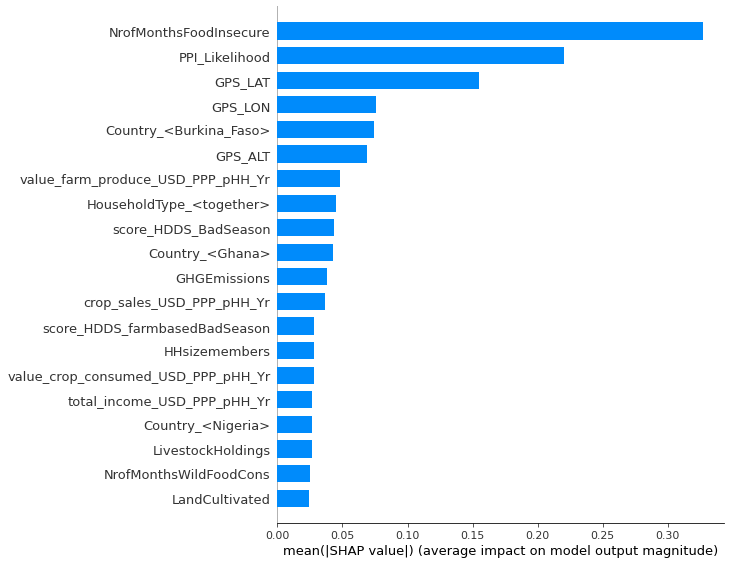

In [18]:
shap.summary_plot(rf_shap_values, test, plot_type="bar")

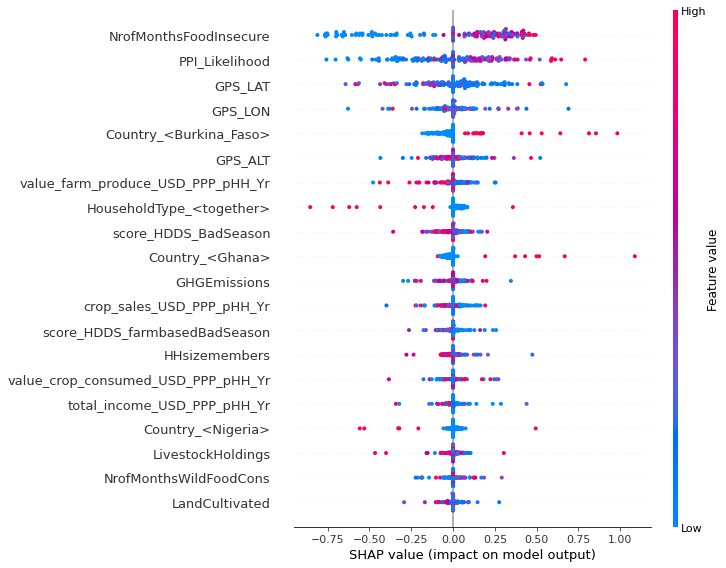

In [17]:
shap.summary_plot(rf_shap_values, test)